In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_raw = pd.read_csv('../data/data_ml.csv') # Load the data
idx_date = data_raw.index[(data_raw['date'] > '1999-12-31') & (data_raw['date'] < '2020-01-01')].to_list() # Creating and index to retrieve dates
data_ml = data_raw.loc[idx_date] # Filtered according to date index
data_ml['date'] = pd.to_datetime(data_ml['date']) # Convert date column to datetime
print(data_ml.info())
print(data_ml.describe())
data_ml.head()

<class 'pandas.core.frame.DataFrame'>
Index: 270350 entries, 0 to 283379
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   stock_id                        270350 non-null  int64         
 1   date                            270350 non-null  datetime64[ns]
 2   Advt_12M_Usd                    270350 non-null  float64       
 3   Advt_3M_Usd                     270350 non-null  float64       
 4   Advt_6M_Usd                     270350 non-null  float64       
 5   Asset_Turnover                  270350 non-null  float64       
 6   Bb_Yld                          270350 non-null  float64       
 7   Bv                              270350 non-null  float64       
 8   Capex_Ps_Cf                     270350 non-null  float64       
 9   Capex_Sales                     270350 non-null  float64       
 10  Cash_Div_Cf                     270350 non-null  float64     

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.0,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.0,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113


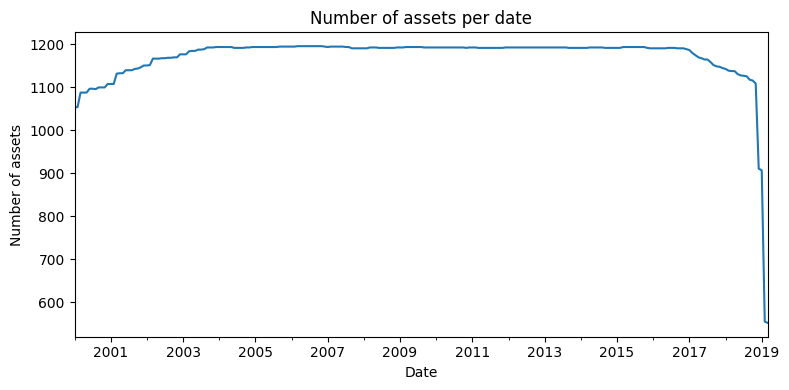

In [4]:
pd.Series(data_ml.groupby('date').size()).plot(figsize=(8,4)) # Number of assets per date
plt.title('Number of assets per date')
plt.xlabel('Date')
plt.ylabel('Number of assets')
plt.tight_layout()
plt.show()

In [5]:
features=list(data_ml.iloc[:,3:95].columns) # Keep the features' column names
features_short =["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", 
                    "Ocf", "Pb", "Vol1Y_Usd"]

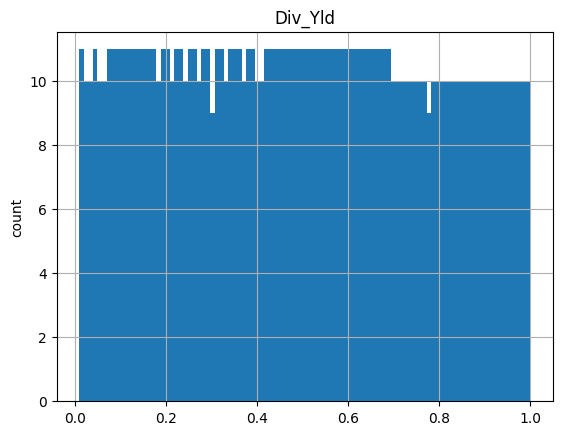

In [6]:
col_feat_Div_Yld = data_ml.columns.get_loc('Div_Yld') # finding the location of the column/feature Div_Yld
is_custom_date = data_ml['date']=='2000-02-29'       # creating a boolean index to filter on 
data_ml[is_custom_date].iloc[:,[col_feat_Div_Yld]].hist(bins=100) # using the hist 
plt.ylabel('count')
plt.show()